In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Fawad's Data/Study data/Internship/Hex Software/Dataset/nigeria_messy_sales_dataset.csv")
df

,Customer Name,State,Product,Units Sold,Unit Price,Total Sale,Sale Date,Sales Channel,Order ID
0,NaN,rivers,KEYBOARD,NaN,NaN,NaN,2025-04-27,Online,NaN
1,Allison Hill,Lagos,Headphones,NaN,267992.94,NaN,2024-03-15,Wholesale,4c636e95-025f-4543-8997-623ae0723d96
2,Noah Rhodes,Anambra,Keyboard,NaN,42364.41,NaN,2024-12-10,NaN,edaf3766-1b78-4ede-9a4f-fc0c9165f2ed
3,Angie Henderson,Delta,Keyboard,NaN,279444.94,NaN,2024-04-05,NaN,74503887-48d9-4846-95c5-51fcfba57cc8
4,Daniel Wagner,Delta,Tablet,NaN,95899.74,NaN,2025-01-12,NaN,8639bd41-8b15-4d94-a42d-0cd7fd359f6a
...,...,...,...,...,...,...,...,...,...
545,Zachary Mitchell,Ekiti,Monitor,6.0,23989.09,143934.54,2025-07-07,Wholesale,b9744cde-d259-4960-aee3-560792ea1324
546,NaN,Katsina,Tablet,NaN,223764.24,NaN,2025-02-11,Wholesale,NaN
547,Katherine Martinez,Bauchi,Phone,NaN,104084.92,NaN,2025-05-18,Retail,61fa8e7a-078c-46ce-bf02-23bc651ea252
548,Jodi Roach,Niger,Charger,NaN,29756.89,NaN,2025-06-29,Direct,5a9c0679-2c3d-47e2-ad39-da75aee70ab2


***UnderStanding The Data***

In [26]:
df.head()

,Customer Name,State,Product,Units Sold,Unit Price,Total Sale,Sale Date,Sales Channel,Order ID
0,NaN,rivers,KEYBOARD,NaN,NaN,NaN,2025-04-27,Online,NaN
1,Allison Hill,Lagos,Headphones,NaN,267992.94,NaN,2024-03-15,Wholesale,4c636e95-025f-4543-8997-623ae0723d96
2,Noah Rhodes,Anambra,Keyboard,NaN,42364.41,NaN,2024-12-10,NaN,edaf3766-1b78-4ede-9a4f-fc0c9165f2ed
3,Angie Henderson,Delta,Keyboard,NaN,279444.94,NaN,2024-04-05,NaN,74503887-48d9-4846-95c5-51fcfba57cc8
4,Daniel Wagner,Delta,Tablet,NaN,95899.74,NaN,2025-01-12,NaN,8639bd41-8b15-4d94-a42d-0cd7fd359f6a


In [27]:
df.tail()

,Customer Name,State,Product,Units Sold,Unit Price,Total Sale,Sale Date,Sales Channel,Order ID
545,Zachary Mitchell,Ekiti,Monitor,6.0,23989.09,143934.54,2025-07-07,Wholesale,b9744cde-d259-4960-aee3-560792ea1324
546,NaN,Katsina,Tablet,NaN,223764.24,NaN,2025-02-11,Wholesale,NaN
547,Katherine Martinez,Bauchi,Phone,NaN,104084.92,NaN,2025-05-18,Retail,61fa8e7a-078c-46ce-bf02-23bc651ea252
548,Jodi Roach,Niger,Charger,NaN,29756.89,NaN,2025-06-29,Direct,5a9c0679-2c3d-47e2-ad39-da75aee70ab2
549,Brandon Fleming,imo,Camera,NaN,70027.13,NaN,2024-02-20,NaN,46653497-2fe9-42aa-a886-a01136f7a26c


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold,155.0,4.685806e+01,2.697316e+01,1.00,24.500,47.00,67.50,100.0
Unit Price,495.0,1.557037e+05,8.444301e+04,1403.13,84873.975,157889.24,224577.17,299437.8
Total Sale,137.0,7.075166e+06,6.338224e+06,57887.04,1788402.030,5049848.25,11199808.18,28734589.8


In [29]:
df.shape

(550, 9)

In [30]:
df.columns

Index(['Customer Name', 'State', 'Product', 'Units Sold', 'Unit Price',
       'Total Sale', 'Sale Date', 'Sales Channel', 'Order ID'],
      dtype='object')

In [62]:
df.nunique()

Customer Name    506
State             40
Product           16
Units Sold        75
Unit Price       495
Total Sale       137
Sale Date        393
Sales Channel      4
Order ID         510
dtype: int64

In [9]:
df["Sales Channel"].unique()

array(['Online', 'Wholesale', nan, 'Direct', 'Retail'], dtype=object)

In [10]:
df.duplicated().sum()

np.int64(0)

***Cleaning The Data***

In [32]:
df.isnull().sum()

Customer Name     43
State              0
Product            0
Units Sold       395
Unit Price        55
Total Sale       413
Sale Date          0
Sales Channel    106
Order ID          40
dtype: int64

In [12]:
df.isnull().sum() / len(df) * 100

Customer Name     7.818182
State             0.000000
Product           0.000000
Units Sold       71.818182
Unit Price       10.000000
Total Sale       75.090909
Sale Date         0.000000
Sales Channel    19.272727
Order ID          7.272727
dtype: float64

In [6]:
df["Customer Name"] = df["Customer Name"].fillna("Unknown")
df["Units Sold"] = df["Units Sold"].fillna(df["Units Sold"].median())
df["Unit Price"] = df["Unit Price"].fillna(df["Unit Price"].median())
df["Total Sale"] = df["Total Sale"].fillna(df["Total Sale"].median())
df["Sales Channel"] = df["Sales Channel"].fillna(df["Sales Channel"].mode()[0])
df = df.drop(columns=["Order ID"], errors="ignore")

In [7]:
df.isnull().sum()

Customer Name    0
State            0
Product          0
Units Sold       0
Unit Price       0
Total Sale       0
Sale Date        0
Sales Channel    0
dtype: int64

***Relationship Analysis***

In [8]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix.style.format("{:.2f}")

,Units Sold,Unit Price,Total Sale
Units Sold,1.00,0.02,0.65
Unit Price,0.02,1.00,0.32
Total Sale,0.65,0.32,1.00


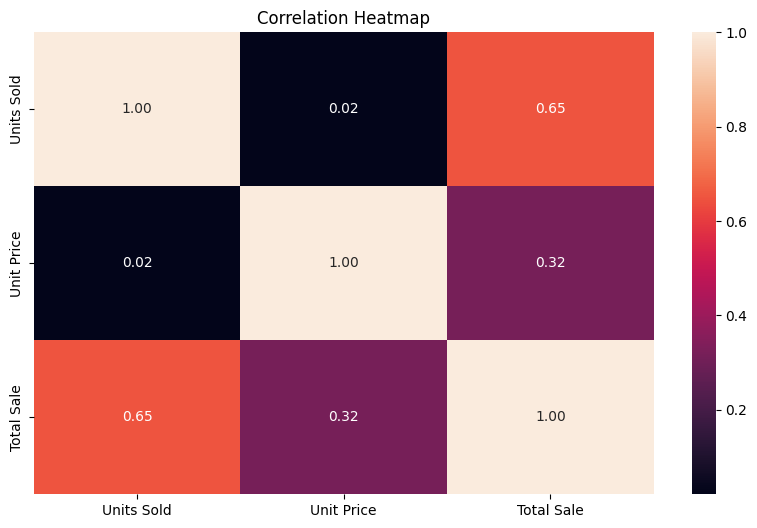

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

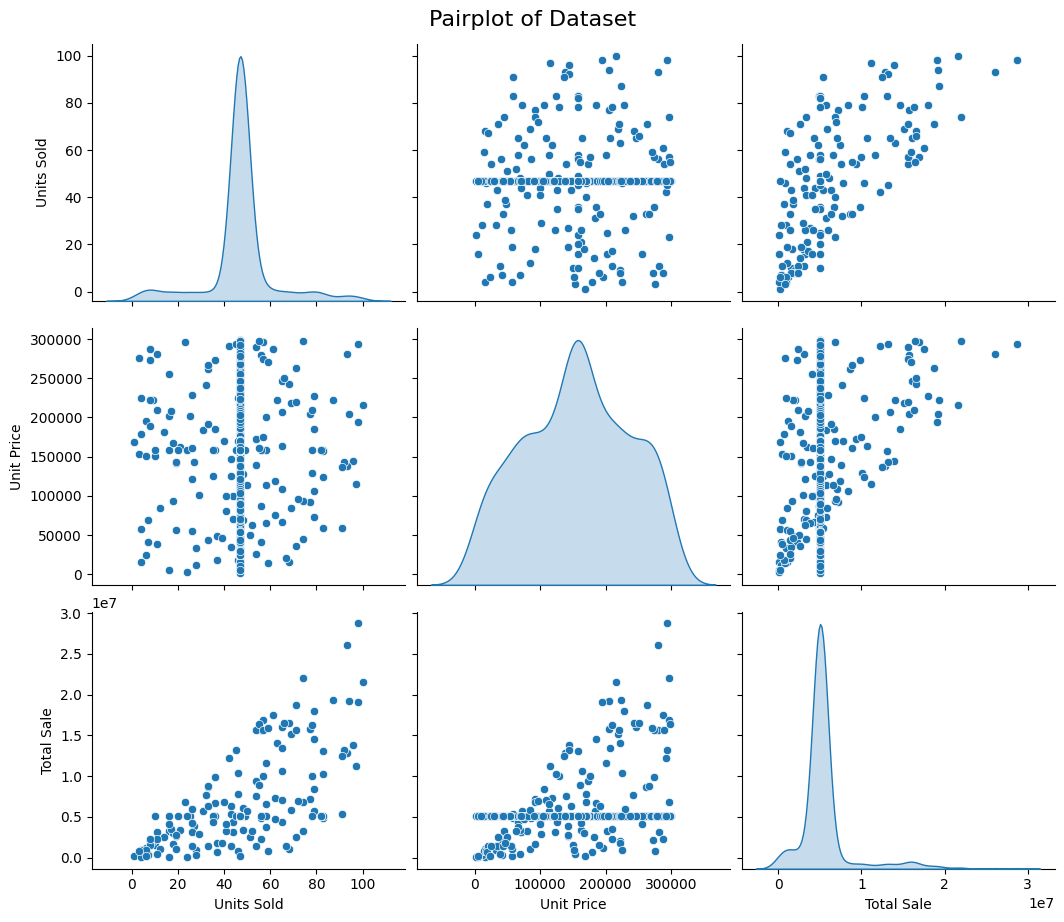

In [11]:
sns.pairplot(df, diag_kind="kde", height=3, aspect=1.2)  
plt.suptitle("Pairplot of Dataset", y=1.02, fontsize=16)  
plt.show()

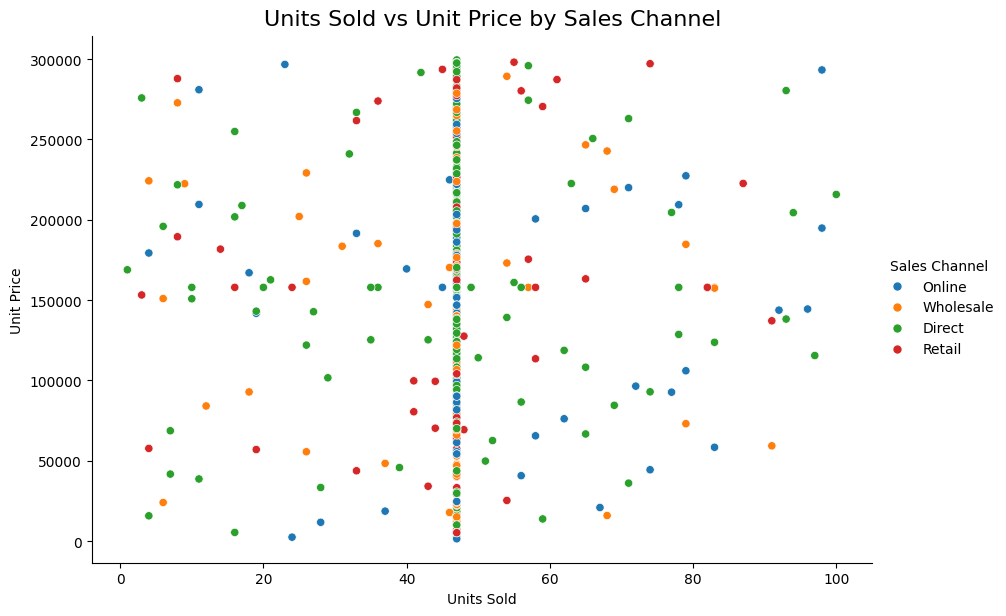

In [ ]:
sns.relplot(x='Units Sold', y='Unit Price', hue='Sales Channel', data=df, height=6, aspect=1.5    )
plt.suptitle("Units Sold vs Unit Price by Sales Channel", y=1.02, fontsize=16)
plt.show()

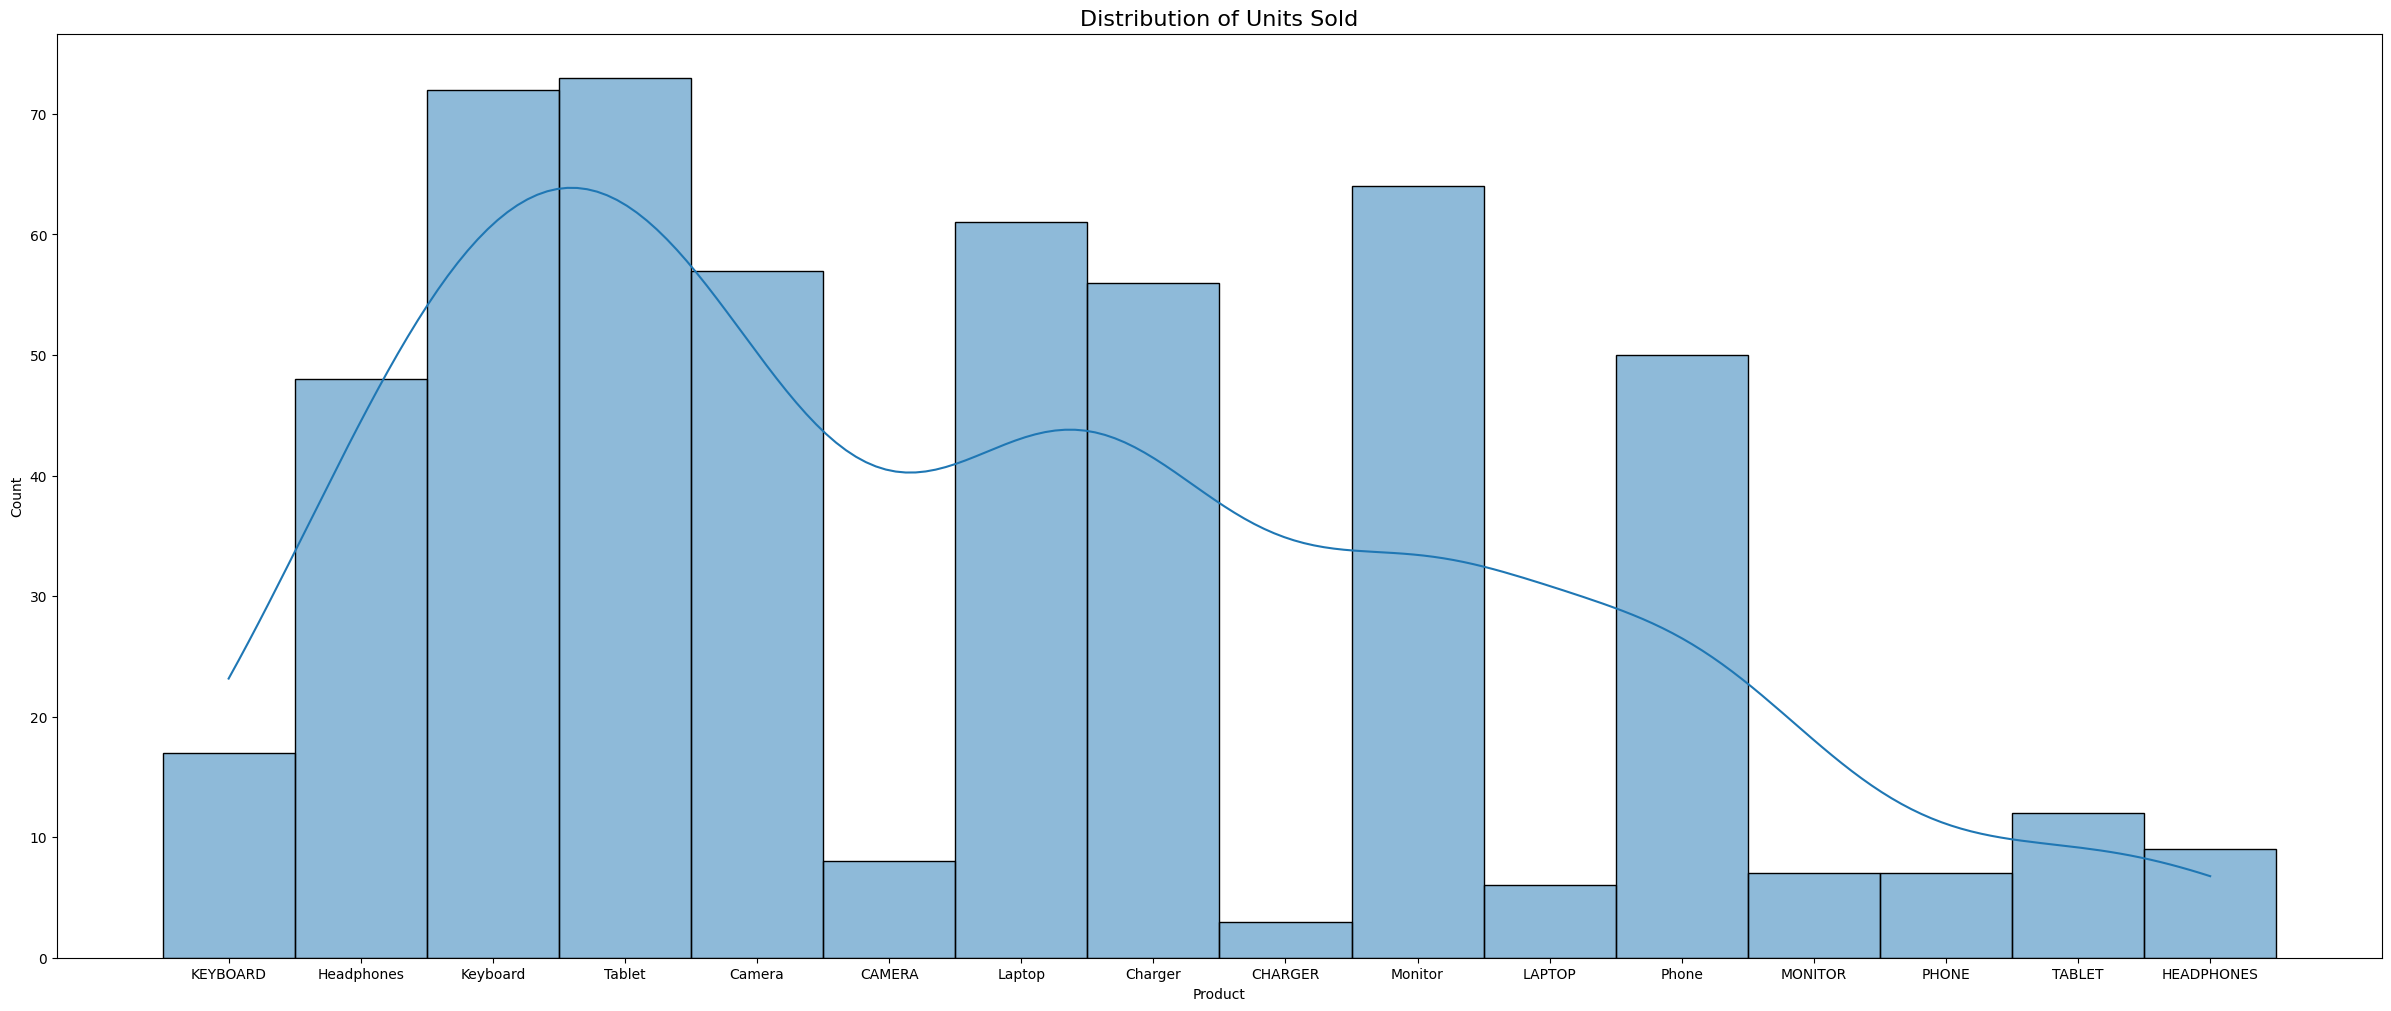

In [119]:
plt.figure(figsize=(30,12))   
sns.histplot(df['Product'], kde=True)
plt.title("Distribution of Units Sold", fontsize=16)
plt.show()


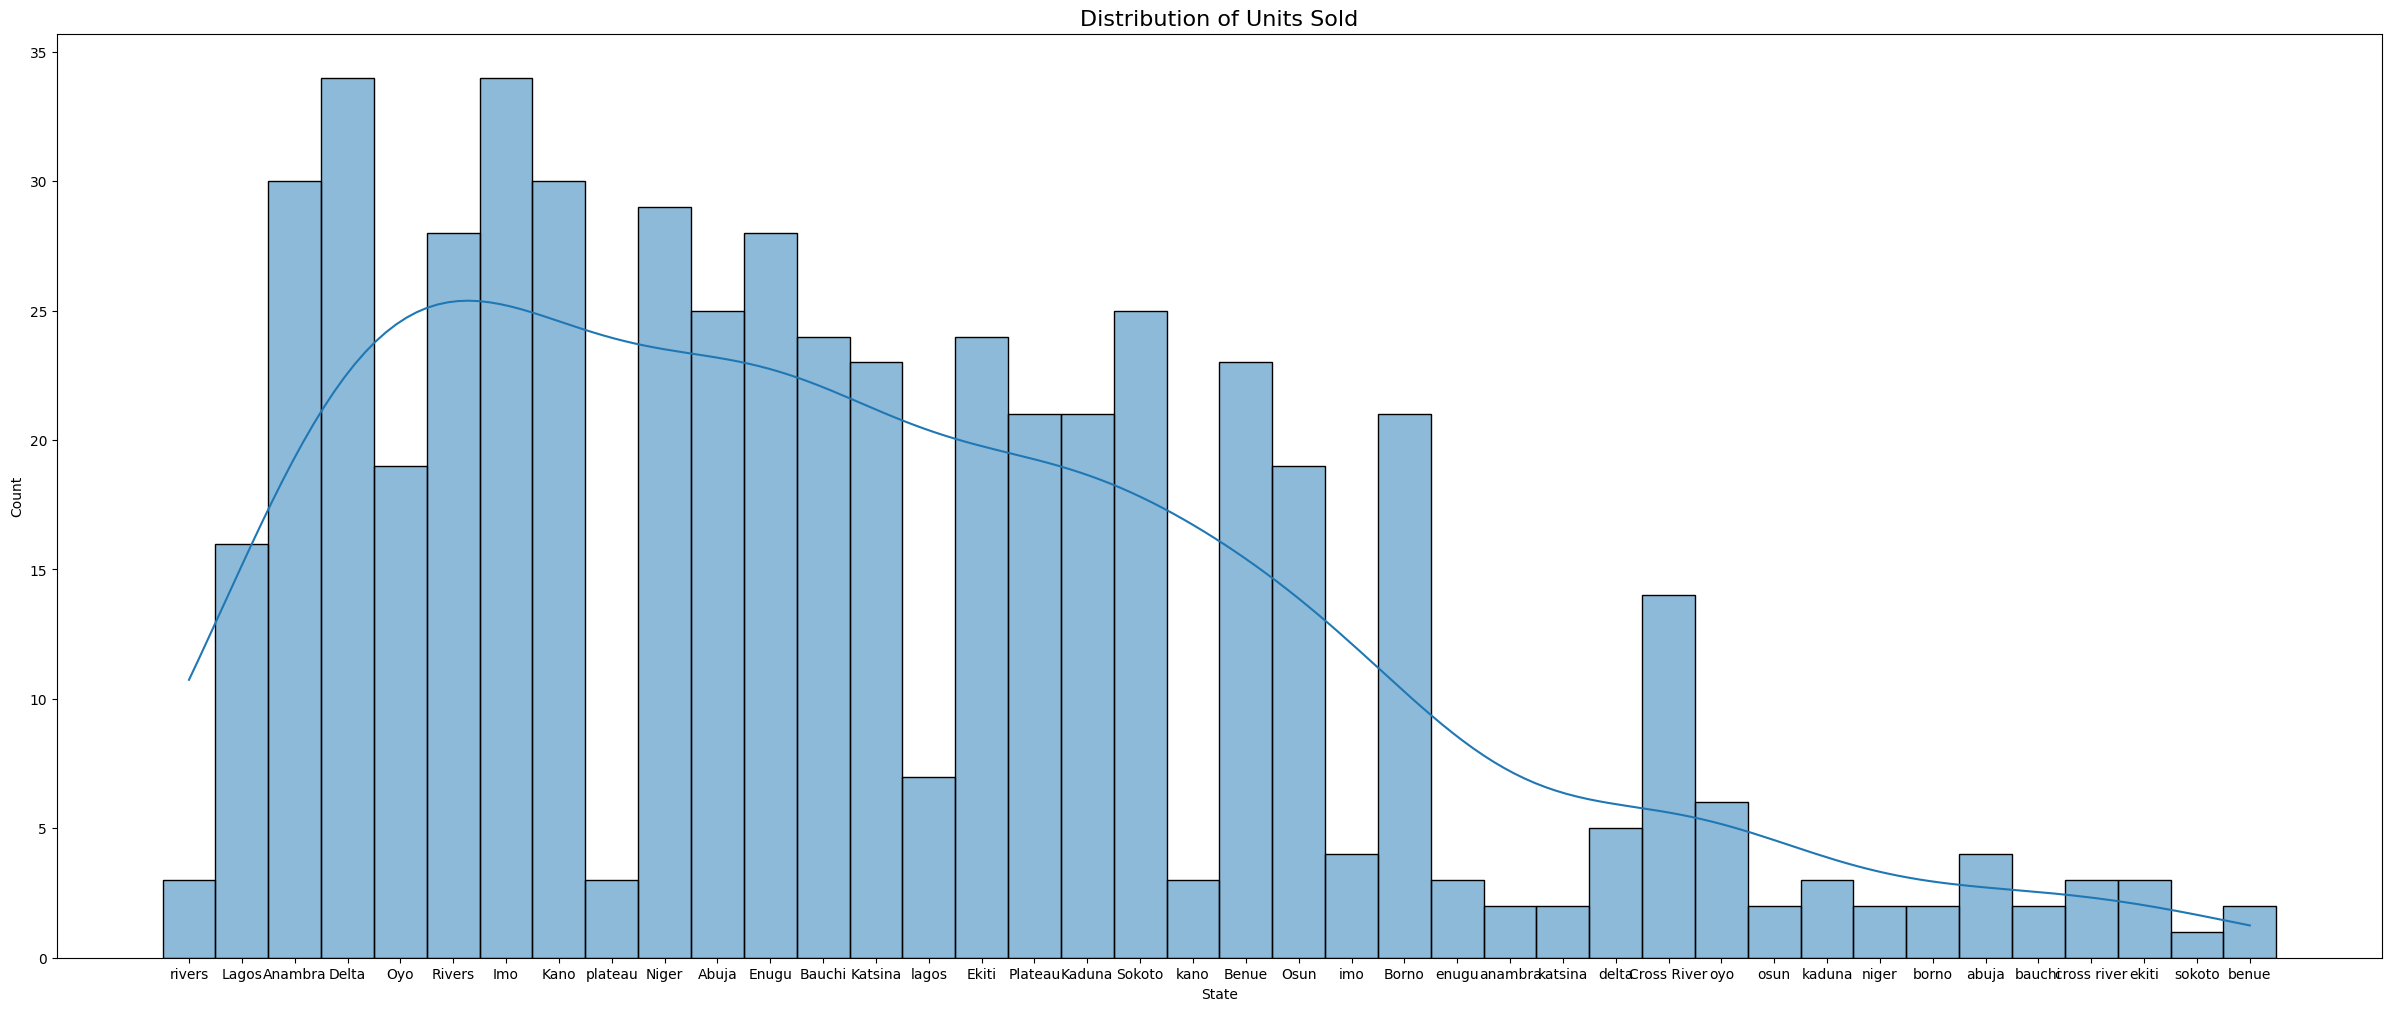

In [120]:
plt.figure(figsize=(30,12))   
sns.histplot(df['State'], kde=True)
plt.title("Distribution of Units Sold", fontsize=16)
plt.show()